In [1]:
# This project is looking to see if Portland's date of last spring frost has or hasn't changed over time.
# Weather data was acquired from NOAA's record of temperatures from PDX International.
# Date of last frost is used by gardeners and farmers to determine when to begin planting in the spring. 
# It also advises when to start plans indoors for transplant outside after danger of frost has passed. 

In [2]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [3]:
# let's see what our data from NOAA looks like 
# Note: Julian date in this context is number of days that have passed since the New Year began when the last frost occurred. 
# A helpful PDF on the NOAA website already had this calculation in a table. 

df = pd.read_csv('freeze-temp-normalized2.csv')
df.head(n=10)

,Spring,Year,Spring_Temp,Julian,Fall,Fall_Temp,Fall_Julian,Season
0,1941-03-14,1941,30,73,1941-11-02,29,324,250
1,1942-03-24,1942,32,83,1942-11-12,29,316,232
2,1943-03-02,1943,29,79,1943-11-23,32,327,247
3,1944-03-29,1944,32,89,1944-11-14,31,319,229
4,1945-04-02,1945,31,92,1945-11-19,32,323,230
5,1946-04-07,1946,32,97,1946-10-16,30,289,191
6,1947-03-06,1947,31,65,1947-11-21,32,325,259
7,1948-04-27,1948,32,118,1948-10-27,32,301,182
8,1949-04-03,1949,32,93,1949-10-18,31,291,197
9,1950-04-24,1950,32,114,1950-11-01,32,314,199


In [4]:
# First things first, let's do a linear regression to begin looking at how the last date of frost correlates to year.
# The hidden variability behind "Year" is the weather patterns of that year.
# The date of last frost is dependent on the weather patterns specific to that year. 
# That can be caused by anything from an El Nino weather pattern to a volcanic eruption. 
# Search Wikipedia for a Year Without a Summer to see how a 1815 eruption caused agricultural disaster worldwide in 1816.

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Julian ~ Year', data=df).fit()

# Inspect the results
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Julian   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     9.534
Date:                Mon, 13 Mar 2017   Prob (F-statistic):            0.00285
Time:                        12:40:53   Log-Likelihood:                -319.01
No. Observations:                  75   AIC:                             642.0
Df Residuals:                      73   BIC:                             646.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    648.2159    182.045      3.561      0.0

In [5]:
# R-squared: 0.116 aka 11.6%
# This is low, but with weather data it is not too unusual. We can expect variability. 
# The question now is: With such variability, how can we predict the next several years' date of last spring frost? 

In [10]:
# let's use a time series analysis to find more meaning and to see what our future values might be. 

# code is from https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

#looking at data types to see if they are properly formed for analysis
print (df.head())
print ('\n Data Types:')
print (df.dtypes)

       Spring  Year  Spring_Temp  Julian        Fall  Fall_Temp  Fall_Julian  \
0  1941-03-14  1941           30      73  1941-11-02         29          324   
1  1942-03-24  1942           32      83  1942-11-12         29          316   
2  1943-03-02  1943           29      79  1943-11-23         32          327   
3  1944-03-29  1944           32      89  1944-11-14         31          319   
4  1945-04-02  1945           31      92  1945-11-19         32          323   

   Season  
0     250  
1     232  
2     247  
3     229  
4     230  

 Data Types:
Spring         object
Year            int64
Spring_Temp     int64
Julian          int64
Fall           object
Fall_Temp       int64
Fall_Julian     int64
Season          int64
dtype: object


In [11]:
# Year isn't being recognized so let's work on that.

In [12]:
# Let's make that Year field mean something 
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y')
data = pd.read_csv('freeze-temp-normalized2.csv',parse_dates=True, index_col='Year',date_parser=dateparse)
print (data.head())

                Spring  Spring_Temp  Julian        Fall  Fall_Temp  \
Year                                                                 
1941-01-01  1941-03-14           30      73  1941-11-02         29   
1942-01-01  1942-03-24           32      83  1942-11-12         29   
1943-01-01  1943-03-02           29      79  1943-11-23         32   
1944-01-01  1944-03-29           32      89  1944-11-14         31   
1945-01-01  1945-04-02           31      92  1945-11-19         32   

            Fall_Julian  Season  
Year                             
1941-01-01          324     250  
1942-01-01          316     232  
1943-01-01          327     247  
1944-01-01          319     229  
1945-01-01          323     230  


In [13]:
# checking that all the Years parse as datetime 
data.index

DatetimeIndex(['1941-01-01', '1942-01-01', '1943-01-01', '1944-01-01',
               '1945-01-01', '1946-01-01', '1947-01-01', '1948-01-01',
               '1949-01-01', '1950-01-01', '1951-01-01', '1952-01-01',
               '1953-01-01', '1954-01-01', '1955-01-01', '1956-01-01',
               '1957-01-01', '1958-01-01', '1959-01-01', '1960-01-01',
               '1961-01-01', '1962-01-01', '1963-01-01', '1964-01-01',
               '1965-01-01', '1966-01-01', '1967-01-01', '1968-01-01',
               '1969-01-01', '1970-01-01', '1971-01-01', '1972-01-01',
               '1973-01-01', '1974-01-01', '1975-01-01', '1976-01-01',
               '1977-01-01', '1978-01-01', '1979-01-01', '1980-01-01',
               '1981-01-01', '1982-01-01', '1983-01-01', '1984-01-01',
               '1985-01-01', '1986-01-01', '1987-01-01', '1988-01-01',
               '1989-01-01', '1990-01-01', '1991-01-01', '1992-01-01',
               '1993-01-01', '1994-01-01', '1995-01-01', '1996-01-01',
      

In [14]:
# setting up for a timeseries analysis
ts = data['Julian']
ts.head(10)

Year
1941-01-01     73
1942-01-01     83
1943-01-01     79
1944-01-01     89
1945-01-01     92
1946-01-01     97
1947-01-01     65
1948-01-01    118
1949-01-01     93
1950-01-01    114
Name: Julian, dtype: int64

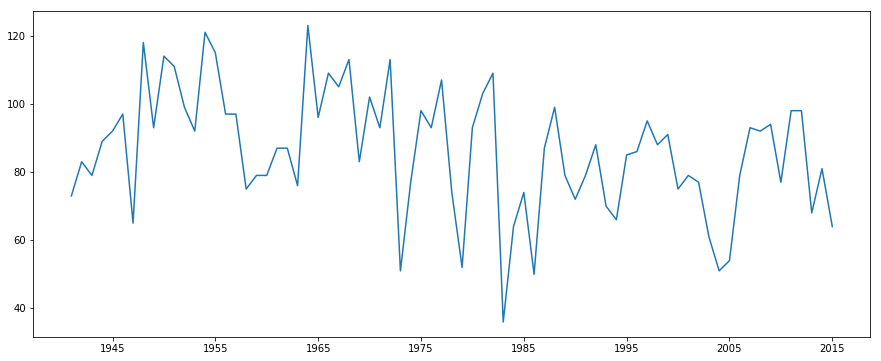

In [15]:
# Let's see how the date of last frost has or hasn't changed between 1941 and 2015 by plotting the time series:
plt.plot(ts)

In [16]:
# Wow, that's a lot of variability!
# Still, there's a downward trend, which looks like Portland's date of last frost seems to be trending earlier in the year. 
# A trend towards earlier in the year is consistent with global warming, but is that really accurate? 

In [17]:
# Function for testing stationarity:

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

c:\users\mundyj\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
c:\users\mundyj\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


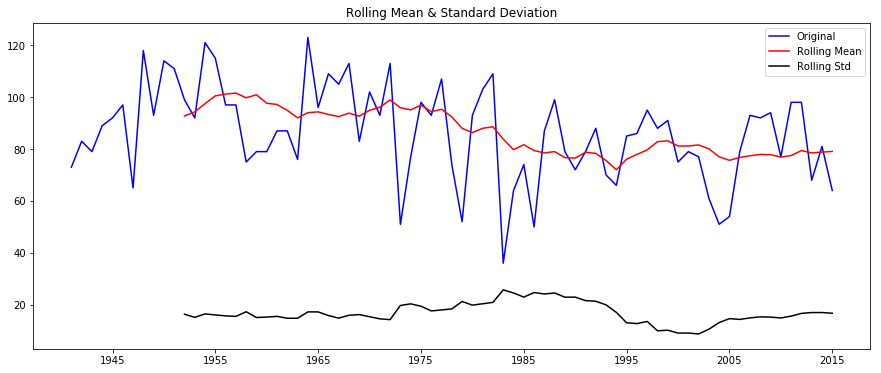

Results of Dickey-Fuller Test:
Test Statistic                -6.179846e+00
p-value                        6.495196e-08
#Lags Used                     0.000000e+00
Number of Observations Used    7.400000e+01
Critical Value (5%)           -2.901470e+00
Critical Value (10%)          -2.588072e+00
Critical Value (1%)           -3.521980e+00
dtype: float64


In [18]:
# let's remove the fluctuations to look at the overall trend via rolling mean
# this looks like the date of last frost is getting to be earlier in the year
# There seems to be a variabilty of around 20 days
# but is this statistically significant? 

test_stationarity(ts)

In [19]:
# With a p-value of 6.49, I can not reject the null hypothesis. 
# The absolute value of my test statistic is greater than any critical value. More evidence that I can not reject the null. 
# Under this current analysis, I can not definitively state that there is significant difference between the dates of last frost.

# For my own reference: 
# Definition of Null Hypothesis: the hypothesis that there is no significant difference between specified populations, 
# ...any observed difference being due to sampling or experimental error.

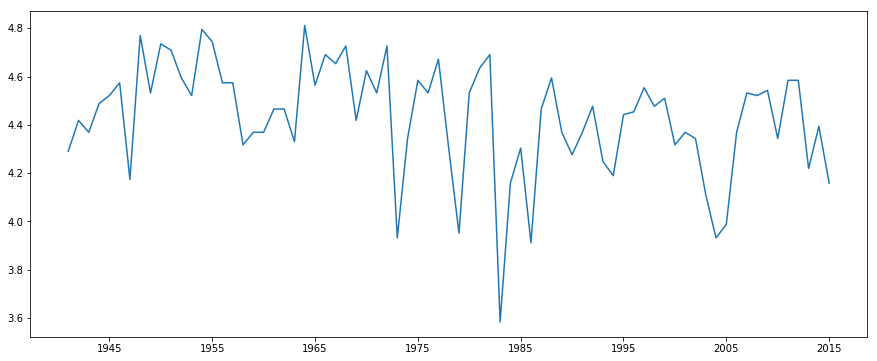

In [20]:
# Run a log function to estimate and eliminate trend
ts_log = np.log(ts)
plt.plot(ts_log)

c:\users\mundyj\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  app.launch_new_instance()


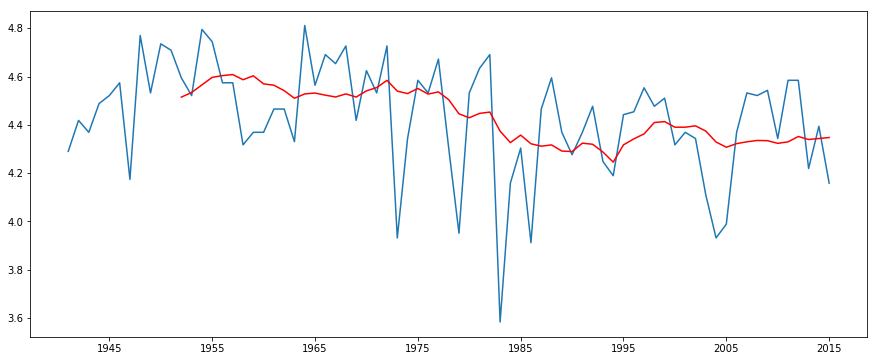

In [21]:
# Let's smooth the moving average as demonstrated by this red line
# still seeing that downward trend but it looks less significant 
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [22]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Year
1941-01-01        NaN
1942-01-01        NaN
1943-01-01        NaN
1944-01-01        NaN
1945-01-01        NaN
1946-01-01        NaN
1947-01-01        NaN
1948-01-01        NaN
1949-01-01        NaN
1950-01-01        NaN
1951-01-01        NaN
1952-01-01    0.07992
Name: Julian, dtype: float64

In [23]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Year
1952-01-01    0.079920
1953-01-01   -0.012689
1954-01-01    0.229900
1955-01-01    0.147752
1956-01-01   -0.029642
Name: Julian, dtype: float64

c:\users\mundyj\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
c:\users\mundyj\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


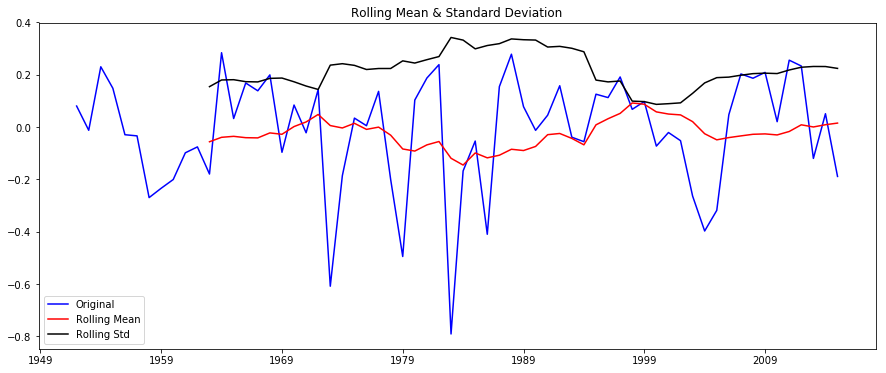

Results of Dickey-Fuller Test:
Test Statistic                -6.273443e+00
p-value                        3.952839e-08
#Lags Used                     0.000000e+00
Number of Observations Used    6.300000e+01
Critical Value (5%)           -2.908645e+00
Critical Value (10%)          -2.591897e+00
Critical Value (1%)           -3.538695e+00
dtype: float64


In [24]:
test_stationarity(ts_log_moving_avg_diff)

In [25]:
# With a p-value of 3.95, I can not reject the null hypothesis that that date of last frost follows a unit root process. 
# The absolute value of my test statistic is greater than any critical value. More evidence that I can not reject the null. 
# It's looking like it's not changed much when removing the variation multi-year weather patterns. 

c:\users\mundyj\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=0,adjust=True,halflife=12,ignore_na=False).mean()


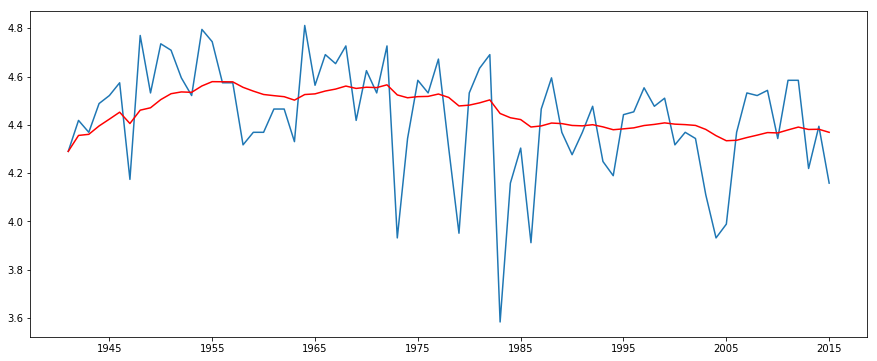

In [26]:
# Now for an exponentially weighted moving average analysis to see if this informs a different outcome.
# It is possible that global climate change has intensified in more recent years. 

expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

c:\users\mundyj\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
c:\users\mundyj\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


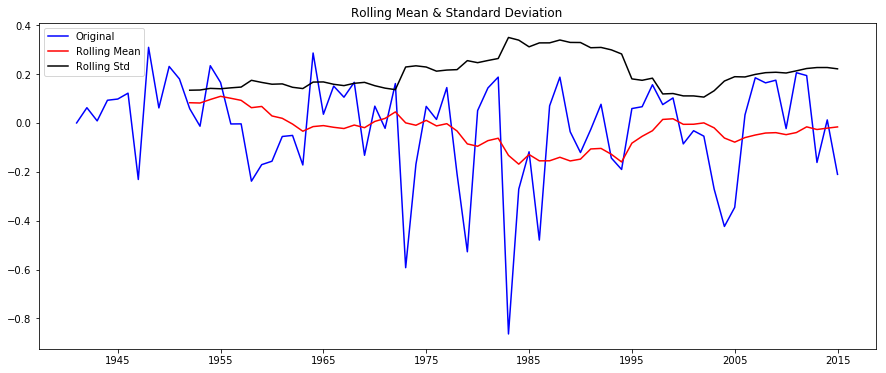

Results of Dickey-Fuller Test:
Test Statistic                -6.911587e+00
p-value                        1.208514e-09
#Lags Used                     0.000000e+00
Number of Observations Used    7.400000e+01
Critical Value (5%)           -2.901470e+00
Critical Value (10%)          -2.588072e+00
Critical Value (1%)           -3.521980e+00
dtype: float64


In [27]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

In [28]:
# Even with an exponential moving average, we're still not seeing evidence...
# that our date of last frost has significantly changed over time. 

# Next up is eliminating trend and seasonality. 

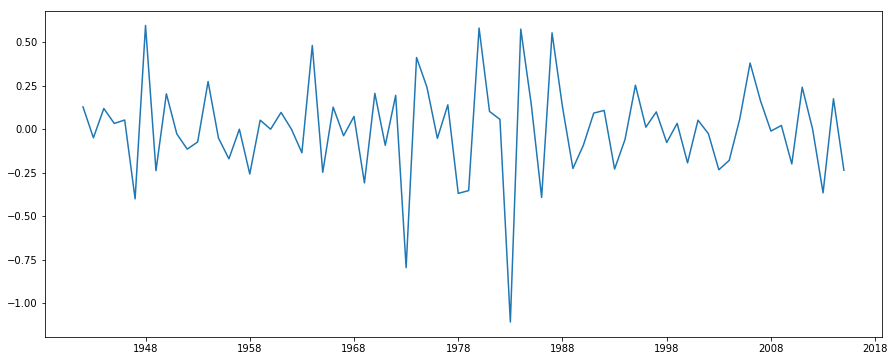

In [29]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

c:\users\mundyj\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
c:\users\mundyj\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


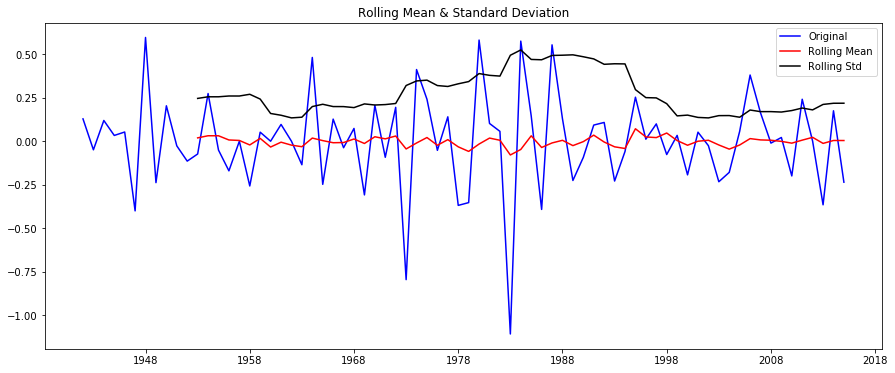

Results of Dickey-Fuller Test:
Test Statistic                -5.717969e+00
p-value                        7.048594e-07
#Lags Used                     8.000000e+00
Number of Observations Used    6.500000e+01
Critical Value (5%)           -2.907154e+00
Critical Value (10%)          -2.591103e+00
Critical Value (1%)           -3.535217e+00
dtype: float64


In [30]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [31]:
# Even when we attempt to eliminate trend, a variance in dates of last frost does not appear to be significant. 

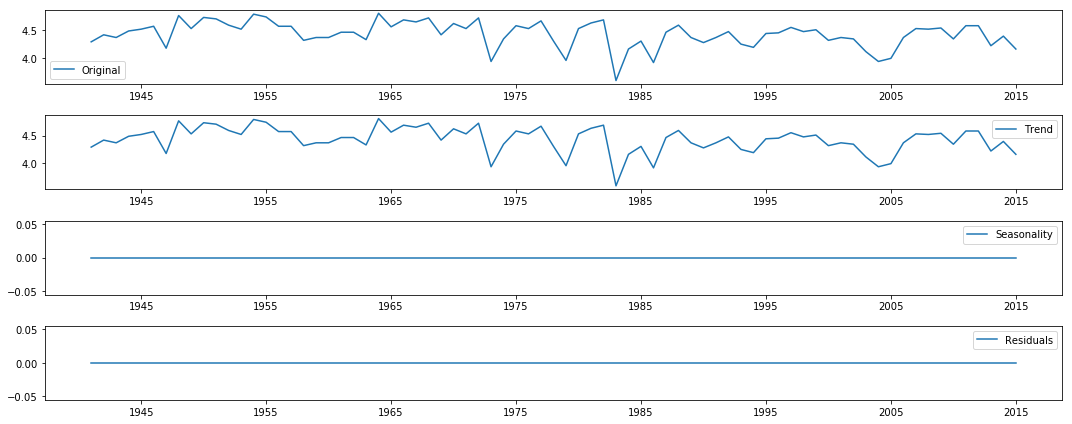

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [33]:
# If I've entered everything correctly, this is saying that there isn't a computable seasonality for this data set

In [ ]:
# Overall, this analysis seems to indicate that date of last spring frost hasn't been gradually declining. 
# 2015 and 2016 had unusually early dates of last frost. 
# An additional analysis could be done using weather data from Downtown Portland, which is less accruate...
# but extends back to 1875. 
# Another analysis could be on the length of the growing season, looking at date of first fall frost in addition. 